In [72]:
import pickle
# try load text-davinci-002_llm_cache.pickle and print
with open('text-davinci-002_llm_cache.pickle', 'rb') as f:
    data = pickle.load(f)
    # print(data)
for _,prompt,_,_,_,_ in list(data.keys()):
    # if 'Age' in prompt:
    print(prompt)
    print(data[list(data.keys())[0]])
    break


  Among these two options which one is the most likely true:
  (A) age initiates socioeconomic status
  (B) socioeconomic status initiates age
  The answer is: 
(A)
  Among these two options which one is the most likely true:
  (A) age initiates socioeconomic status
  (B) socioeconomic status initiates age
  The answer is: 
(B)
{
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": {
        "text_offset": [
          0,
          1,
          2,
          8,
          14,
          18,
          26,
          32,
          36,
          39,
          43,
          48,
          55,
          60,
          61,
          62,
          63,
          65,
          66,
          67,
          71,
          77,
          81,
          95,
          102,
          103,
          104,
          106,
          107,
          108,
          122,
          129,
          135,
          139,
          143,
          144,
          145,
          149,
        

In [79]:
list(data.keys())[2]

('text-davinci-002',
 '\n  Among these two options which one is the most likely true:\n  (A) socioeconomic status catalyzes neighbourhood type\n  (B) neighbourhood type catalyzes socioeconomic status\n  The answer is: \n(A)\n  Among these two options which one is the most likely true:\n  (A) socioeconomic status catalyzes neighbourhood type\n  (B) neighbourhood type catalyzes socioeconomic status\n  The answer is: \n(B)',
 0,
 0,
 1,
 True)

In [69]:
from utils.data_generation import generate_dataset
G,data=generate_dataset('./_raw_bayesian_nets/asia.bif')

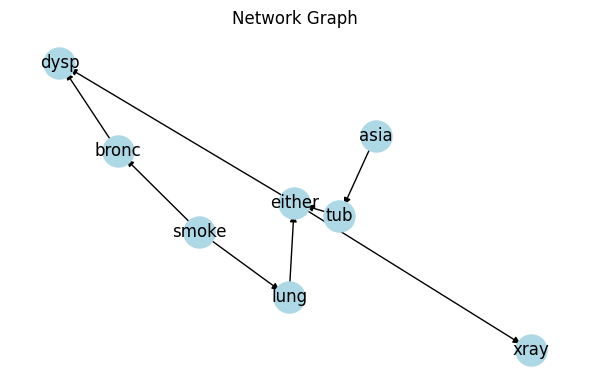

{('asia', 'tub'): 'asia->tub', ('bronc', 'dysp'): 'bronc->dysp', ('either', 'xray'): 'either->xray', ('either', 'dysp'): 'either->dysp', ('lung', 'either'): 'lung->either', ('smoke', 'lung'): 'smoke->lung', ('smoke', 'bronc'): 'smoke->bronc', ('tub', 'either'): 'tub->either'}


In [13]:
# display G
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def visualize_graph(G, title="Network Graph", layout_func=nx.spring_layout, 
                   node_color='lightblue', node_size=500, 
                   with_labels=True, arrows=True):
    """
    Visualize a NetworkX graph with customizable options.
    
    Parameters:
    -----------
    G : networkx.Graph or networkx.DiGraph
        The graph to visualize
    title : str
        Title of the plot
    layout_func : callable
        NetworkX layout function to use (e.g., nx.spring_layout, nx.circular_layout)
    node_color : str or list
        Color(s) of the nodes
    node_size : int or list
        Size(s) of the nodes
    with_labels : bool
        Whether to show node labels
    arrows : bool
        Whether to show arrow directions (for directed graphs)
    """
    plt.figure(figsize=(6, 4))
    pos = layout_func(G)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, arrows=arrows)
    
    # Draw labels if requested
    if with_labels:
        nx.draw_networkx_labels(G, pos)
    
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_graph(G)
edge_labels = {(u, v): f"{u}->{v}" for (u, v) in G.edges()}
print(edge_labels)

In [50]:
set(G.nodes)
set(G.edges)

{('asia', 'tub'),
 ('bronc', 'dysp'),
 ('either', 'dysp'),
 ('either', 'xray'),
 ('lung', 'either'),
 ('smoke', 'bronc'),
 ('smoke', 'lung'),
 ('tub', 'either')}

In [52]:
from causaldag import DAG
cpdag = DAG.from_nx(G).cpdag()
print(cpdag.arcs)
print(cpdag.edges)
print(cpdag._known_arcs)

{('lung', 'either'), ('either', 'dysp'), ('tub', 'either'), ('bronc', 'dysp'), ('either', 'xray')}
{frozenset({'tub', 'asia'}), frozenset({'smoke', 'lung'}), frozenset({'smoke', 'bronc'})}
{('either', 'dysp'), ('tub', 'either'), ('bronc', 'dysp'), ('lung', 'either')}


In [53]:
from causallearn.search.ConstraintBased.PC import pc
from causaldag import PDAG
import numpy as np

def PC(df):
    # get df column names to list
    columns = list(df.columns)

    # to numpy array
    data = df.to_numpy()
    cg = pc(data,node_names=columns)
    
    # convert casual dag to DAG PDAG
    # get all nodes
    nodes = set(columns)
    
    # get all directed edges
    directed_edges = set()
    undirected_edges = set()
    for i in range(len(columns)):
        for j in range(i+1,len(columns)):
            if cg.G.graph[i,j]==-1 and cg.G.graph[j,i]==1:
                # directed edge i -> j
                directed_edges.add((columns[i],columns[j]))
            elif cg.G.graph[i,j]==-1 and cg.G.graph[j,i]==-1:
                # undirected edge i - j
                undirected_edges.add((columns[i],columns[j]))
            elif cg.G.graph[i,j]==1 and cg.G.graph[j,i]==1:
                # undirected edge i <-> j
                undirected_edges.add((columns[i],columns[j]))
    
    # init PDAG object
    pdag = PDAG(nodes=nodes, arcs=directed_edges, edges=undirected_edges, known_arcs=directed_edges)
    return pdag

  0%|          | 0/8 [00:00<?, ?it/s]

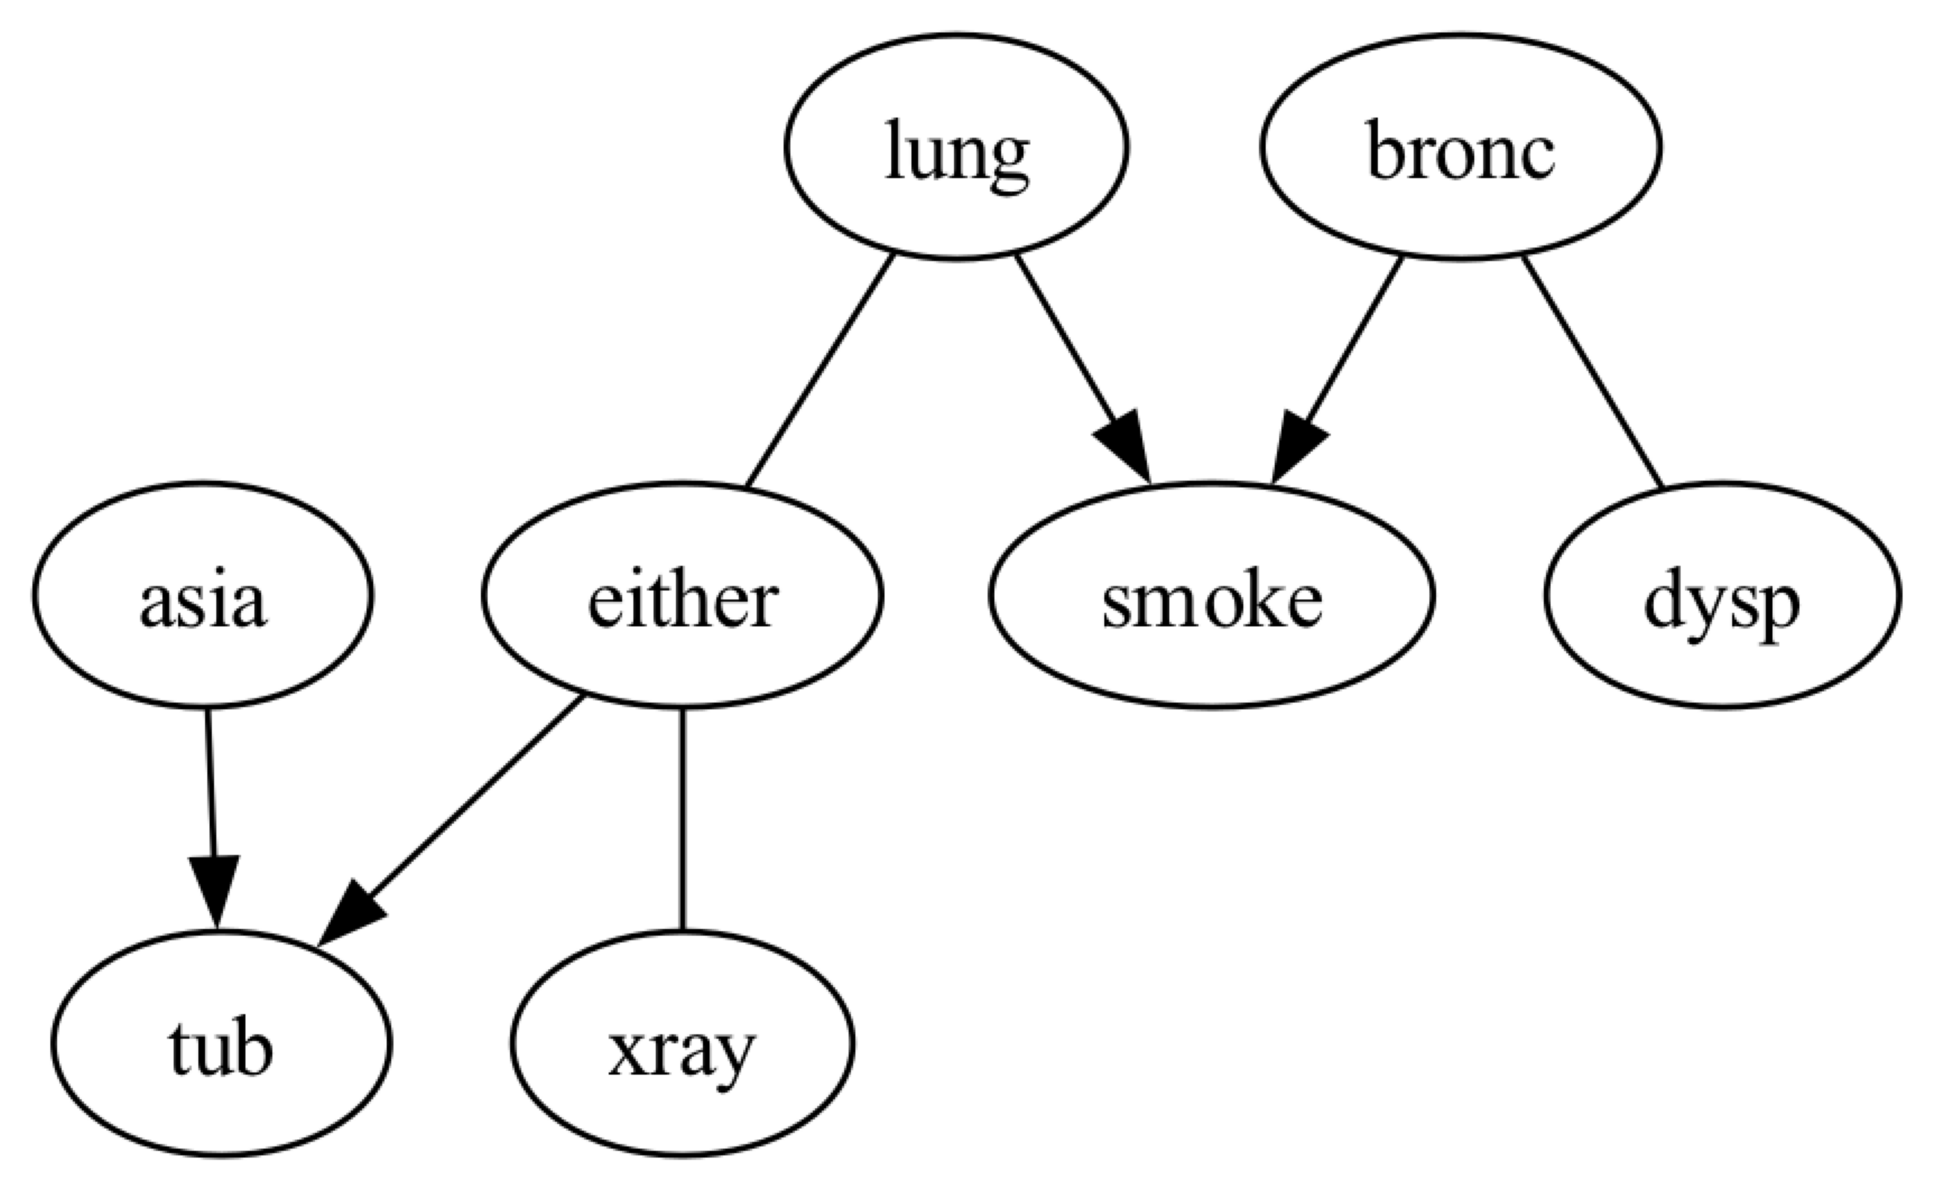

In [70]:
columns = list(data.columns)
cg = pc(data.to_numpy(),node_names=columns)
cg.draw_pydot_graph()

In [56]:
PC(data)

  0%|          | 0/8 [00:00<?, ?it/s]

In [54]:
cg=PC(data)

  0%|          | 0/8 [00:00<?, ?it/s]

In [45]:
cg.G.graph

array([[ 0, -1,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0, -1,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0, -1],
       [ 0,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0]])

In [73]:
import pickle
# try load text-davinci-002_llm_cache.pickle and print
with open('text-davinci-002_llm_cache.pickle', 'rb') as f:
    data = pickle.load(f)
    # print(data)
count=0
for key in list(data.keys()):
    # if 'Age' in prompt:
    print(key)
    print(data[key])
    count+=1
    if count>10:
        break


('text-davinci-002', '\n  Among these two options which one is the most likely true:\n  (A) age initiates socioeconomic status\n  (B) socioeconomic status initiates age\n  The answer is: \n(A)\n  Among these two options which one is the most likely true:\n  (A) age initiates socioeconomic status\n  (B) socioeconomic status initiates age\n  The answer is: \n(B)', 0, 0, 1, True)
{
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": {
        "text_offset": [
          0,
          1,
          2,
          8,
          14,
          18,
          26,
          32,
          36,
          39,
          43,
          48,
          55,
          60,
          61,
          62,
          63,
          65,
          66,
          67,
          71,
          77,
          81,
          95,
          102,
          103,
          104,
          106,
          107,
          108,
          122,
          129,
          135,
          139,
          143,
    

In [77]:
import openai
openai.api_key = ""
engine='gpt-3.5-turbo'
engine='text-davinci-003'
prompt='\n  Among these two options which one is the most likely true:\n  (A) age initiates socioeconomic status\n  (B) socioeconomic status initiates age\n  The answer is: \n(A)\n  Among these two options which one is the most likely true:\n  (A) age initiates socioeconomic status\n  (B) socioeconomic status initiates age\n  The answer is: \n(B)'
response = openai.Completion.create(engine=engine, 
                                        prompt=prompt, 
                                        max_tokens=128, 
                                        temperature=0,
                                        logprobs=1,
                                        echo=True)
print(response)

INFO:openai:error_code=model_not_found error_message='The model `text-davinci-003` has been deprecated, learn more here: https://platform.openai.com/docs/deprecations' error_param=None error_type=invalid_request_error message='OpenAI API error received' stream_error=False


InvalidRequestError: The model `text-davinci-003` has been deprecated, learn more here: https://platform.openai.com/docs/deprecations